<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_5_logreg/sem5_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 5. Линейные модели классификации.

План занятия:

1. Логистическая регрессия

2. Метод опорных векторов

3. Интегральные метрики классификации

4. Подбор гиперпараметров моделей

5. Регуляризация

Будем решать задачу классификации вина по его химическим свойствам.


In [1]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine(as_frame = True)

X = data.data
X = X[X.columns[:7]]

y = data.target

In [42]:
y.value_counts()

In [42]:
X.head()


Сведем задачу к бинарной классификации: будем определять, является ли вино вином типа 1 или нет.


In [42]:
y[y != 1] = 0

y.value_counts()

Разобъем данные на train и test.

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Приведем признаки к одному масштабу.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=X.columns)

Обучим метод опорных векторов на тренировочных данных и оценим качество на тестовых данных при помощи метрики ROC-AUC.

Метрика ROC-AUC оперирует в терминах вероятностей, поэтому для ее вычисления алгоритм должен предсказывать вероятности (методом `predict_proba`).

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(Xtrain, ytrain)

In [8]:
pred = model.predict(Xtest)

In [9]:
probs = model.predict_proba(Xtest)[:,1]

In [42]:
probs[:10]

In [11]:
classes = probs > 0.8

In [42]:
pred[:10]

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, \
recall_score, f1_score

print('accuracy:', accuracy_score(ytest, classes))

In [42]:
confusion_matrix(ytest, classes)

In [42]:
print('precision:', precision_score(ytest, classes))

In [42]:
print('recall:', recall_score(ytest, classes))

In [42]:
print('f1:', f1_score(ytest, classes))

Для оценки качества будем использовать метрику ROC-AUC.

In [42]:
from sklearn.metrics import roc_auc_score

pred = model.predict_proba(Xtest)[:,1]

roc_auc_score(ytest, pred)

In [42]:
classes = model.predict(Xtest)

print(classes[:5])
print(pred[:5])

Также можем нарисовать полученную ROC-кривую.

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Метод опорных векторов

In [25]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)

* обучите метод на тренировочных данных

* спрогнозируйте вероятности на тестовых данных

* вычислите ROC-AUC на тестовых данных

In [26]:
# your code here

## Ядра в методе опорных векторов

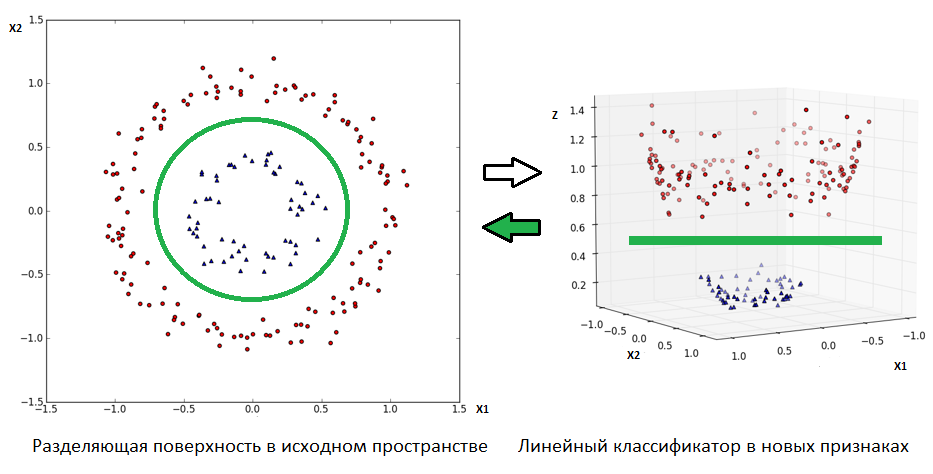

$$(x_1,x_2) \to (x_1,x_2,z = x_1^2+x_2^2)$$

In [27]:
model = SVC(kernel='rbf', probability=True)

* обучите метод на тренировочных данных

* спрогнозируйте вероятности на тестовых данных

* вычислите ROC-AUC на тестовых данных

In [28]:
# your code here

## Подбор гиперпараметров

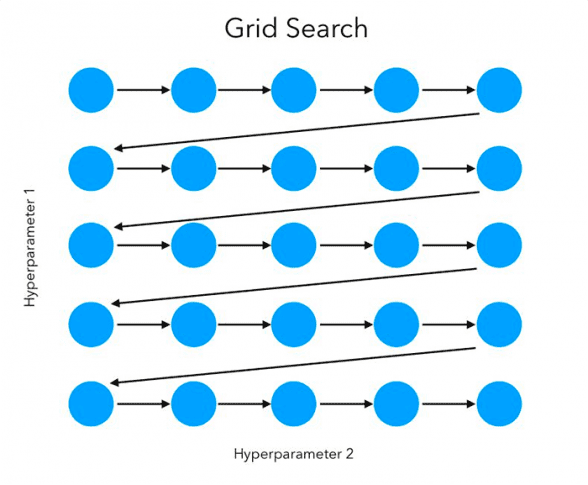

In [42]:
from sklearn.model_selection import GridSearchCV

params = {'kernel' : ['linear', 'rbf', 'poly']}

model = SVC(probability=True)

gs = GridSearchCV(model, params, cv=3, scoring='roc_auc', verbose=3)

gs.fit(Xtrain, ytrain)

In [42]:
gs.best_score_

In [42]:
gs.best_params_

In [42]:
probs = gs.best_estimator_.predict_proba(Xtest)[:,1]

roc_auc_score(ytest, probs)

## Регуляризация

* LinearRegression -> Lasso, Ridge, ElasticNet

* Гиперпараметр `C` в линейных классификаторах